<a href="https://colab.research.google.com/github/codeby3/searchable-encryption/blob/main/zilliz/unencrypted/zilliz_unencrypted_vector_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [1]:
!pip install -qU beir sentence-transformers pymilvus datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.1/228.1 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!pip install --upgrade --quiet torch torchvision --extra-index-url https://download.pytorch.org/whl/cu118

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
from beir import util
from beir.datasets.data_loader import GenericDataLoader
from beir.retrieval.evaluation import EvaluateRetrieval
import pandas as pd
from pymilvus import MilvusClient, FieldSchema, DataType, CollectionSchema, Collection
from sentence_transformers import SentenceTransformer
import torch
from google.colab import userdata
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

/usr/local/lib/python3.11/dist-packages/beir/util.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load Datasets
We're using 3 datasets from the BEIR datasets - nfcorpus, fiqa and scidocs (https://huggingface.co/datasets/BeIR/beir)

In [4]:
datasets_to_load = ["nfcorpus", "fiqa", "scidocs"]
beir_data_path = "./beir_datasets" # Local directory to store BEIR data
os.makedirs(beir_data_path, exist_ok=True)
loaded_beir_data = {}

In [5]:
for dataset_name in datasets_to_load:
    print(f"\nProcessing dataset: {dataset_name}")

    # Step 3a: Download the dataset
    url = f"https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{dataset_name}.zip"
    out_dir = os.path.join(beir_data_path, dataset_name)

    if not os.path.exists(out_dir):
        print(f"Downloading {dataset_name} from {url} to {out_dir}...")
        data_path = util.download_and_unzip(url, out_dir)
        print(f"Downloaded {dataset_name} to: {data_path}")
    else:
        print(f"Dataset {dataset_name} already exists at {out_dir}. Skipping download.")
        data_path = out_dir

    # Step 3b: Load the corpus, queries, and qrels
    try:
        corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")
        loaded_beir_data[dataset_name] = {
            "corpus": corpus,
            "queries": queries,
            "qrels": qrels
        }
        print(f"Successfully loaded data for {dataset_name}.")
        print(f"  Corpus size: {len(corpus)} documents")
        print(f"  Queries size: {len(queries)} queries")
        print(f"  Qrels size: {len(qrels)} relevance judgments")

        # Print a sample document and query to verify
        if len(corpus) > 0:
            sample_doc_id = list(corpus.keys())[0]
            print(f"  Sample corpus entry ({sample_doc_id}): {corpus[sample_doc_id]['title']} - {corpus[sample_doc_id]['text'][:100]}...")
        if len(queries) > 0:
            sample_query_id = list(queries.keys())[0]
            print(f"  Sample query entry ({sample_query_id}): {queries[sample_query_id][:100]}...")

    except Exception as e:
        print(f"Error loading {dataset_name}: {e}")


Processing dataset: nfcorpus


./beir_datasets/nfcorpus/nfcorpus.zip:   0%|          | 0.00/2.34M [00:00<?, ?iB/s]

Downloaded nfcorpus to: ./beir_datasets/nfcorpus/nfcorpus


  0%|          | 0/3633 [00:00<?, ?it/s]

Successfully loaded data for nfcorpus.
  Corpus size: 3633 documents
  Queries size: 323 queries
  Qrels size: 323 relevance judgments
  Sample corpus entry (MED-10): Statin Use and Breast Cancer Survival: A Nationwide Cohort Study from Finland - Recent studies have suggested that statins, an established drug group in the prevention of cardiovas...
  Sample query entry (PLAIN-2): Do Cholesterol Statin Drugs Cause Breast Cancer?...

Processing dataset: fiqa


./beir_datasets/fiqa/fiqa.zip:   0%|          | 0.00/17.1M [00:00<?, ?iB/s]

Downloaded fiqa to: ./beir_datasets/fiqa/fiqa


  0%|          | 0/57638 [00:00<?, ?it/s]

Successfully loaded data for fiqa.
  Corpus size: 57638 documents
  Queries size: 648 queries
  Qrels size: 648 relevance judgments
  Sample corpus entry (3):  - I'm not saying I don't like the idea of on-the-job training too, but you can't expect the company to...
  Sample query entry (8): How to deposit a cheque issued to an associate in my business into my business account?...

Processing dataset: scidocs


./beir_datasets/scidocs/scidocs.zip:   0%|          | 0.00/136M [00:00<?, ?iB/s]

Downloaded scidocs to: ./beir_datasets/scidocs/scidocs


  0%|          | 0/25657 [00:00<?, ?it/s]

Successfully loaded data for scidocs.
  Corpus size: 25657 documents
  Queries size: 1000 queries
  Qrels size: 1000 relevance judgments
  Sample corpus entry (632589828c8b9fca2c3a59e97451fde8fa7d188d): A hybrid of genetic algorithm and particle swarm optimization for recurrent network design - An evolutionary recurrent network which automates the design of recurrent neural/fuzzy networks usin...
  Sample query entry (78495383450e02c5fe817e408726134b3084905d): A Direct Search Method to solve Economic Dispatch Problem with Valve-Point Effect...


# Ingest data in Zilliz Vector DB

In [6]:
ZILLIZ_CLOUD_URI = userdata.get("ZILLIZ_ENDPOINT")
ZILLIZ_CLOUD_API_KEY = userdata.get("ZILLIZ_TOKEN")

In [7]:
zilliz_client = MilvusClient(
        uri=ZILLIZ_CLOUD_URI,
        token=ZILLIZ_CLOUD_API_KEY
    )

Using all-MiniLM-L6-v2 embedding model from HuggingFace SentenceTransformers Library. It generates embeddings of 384 dimensions.



In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
try:
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)
    print(f"Model 'all-MiniLM-L6-v2' loaded successfully on {device}.")
    # Verify model output dimension (all-MiniLM-L6-v2 has 384 dimensions)
    dummy_embedding = embedding_model.encode("test sentence")
    print(f"Model output dimension: {len(dummy_embedding)}")

except Exception as e:
    print(f"Failed to load embedding model: {e}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model 'all-MiniLM-L6-v2' loaded successfully on cuda.
Model output dimension: 384


Batch ingestion

In [9]:
DIMENSION = 384 # Dimension for all-MiniLM-L6-v2
BATCH_SIZE = 64
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
ingestion_metrics = {}

In [10]:
for dataset_name in loaded_beir_data:
    print(f"\nProcessing Zilliz ingestion for dataset: {dataset_name}")

    # Zilliz collection names are case-sensitive and prefer underscores
    collection_name = f"beir_{dataset_name.replace('-', '_')}"

    # Define and Create Collection

    # Check if collection already exists to avoid recreation errors
    if zilliz_client.has_collection(collection_name=collection_name):
        print(f"Collection '{collection_name}' already exists. Dropping and recreating.")
        zilliz_client.drop_collection(collection_name=collection_name)

    fields = [
        FieldSchema(name="doc_id", dtype=DataType.VARCHAR, max_length=512, is_primary=True),
        FieldSchema(name="title", dtype=DataType.VARCHAR, max_length=512),
        FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=65535), # Max length for string type
        FieldSchema(name="vector", dtype=DataType.FLOAT_VECTOR, dim=DIMENSION)
    ]
    schema = CollectionSchema(fields, description=f"BEIR {dataset_name} documents")

    print(f"Creating collection '{collection_name}'...")
    zilliz_client.create_collection(
        collection_name=collection_name,
        schema=schema,
        consistency_level="Strong"
    )
    print(f"Collection '{collection_name}' created successfully.")

    # Iterate, Embed, Prepare, and Insert
    corpus = loaded_beir_data[dataset_name]["corpus"]

    # Prepare data for batching
    doc_ids = list(corpus.keys())
    num_documents = len(doc_ids)

    start_total_ingestion = time.perf_counter()

    documents_to_embed = [] # List of concatenated "title text"
    original_titles = []
    original_texts = []

    for doc_id in doc_ids:
        title = corpus[doc_id].get("title", "")
        text = corpus[doc_id].get("text", "")

        # Concatenate title and text for embedding as recommended for relevance
        content_to_embed = f"{title} {text}".strip()

        documents_to_embed.append(content_to_embed)
        original_titles.append(title)
        original_texts.append(text)

    print(f"Generating embeddings and inserting data for '{dataset_name}' corpus ({len(doc_ids)} documents)...")

    # Process in batches
    for i in tqdm(range(0, len(doc_ids), BATCH_SIZE), desc=f"Ingesting {dataset_name}"):
        batch_doc_ids = doc_ids[i:i + BATCH_SIZE]
        batch_contents = documents_to_embed[i:i + BATCH_SIZE]
        batch_titles = original_titles[i:i + BATCH_SIZE]
        batch_texts = original_texts[i:i + BATCH_SIZE]

        # Generate embeddings for the current batch
        # Ensure conversion to list as per pymilvus insert requirements
        batch_vectors = embedding_model.encode(batch_contents, convert_to_list=True)

        # Prepare entities for insertion
        entities = []
        for j in range(len(batch_doc_ids)):
            entities.append({
                "doc_id": batch_doc_ids[j],
                "title": batch_titles[j],
                "text": batch_texts[j],
                "vector": batch_vectors[j]
            })

        # Insert the batch
        zilliz_client.insert(
            collection_name=collection_name,
            data=entities
        )

    # Calculate ingestion time
    end_total_ingestion = time.perf_counter()
    total_ingestion_time = end_total_ingestion - start_total_ingestion
    print(f"Finished inserting data for '{dataset_name}'. Total ingestion time: {total_ingestion_time:.2f} seconds")

    # Calculate embedding size
    estimated_embedding_size_bytes = num_documents * DIMENSION * 4
    estimated_embedding_size_mb = estimated_embedding_size_bytes / (1024 * 1024) # Convert to MB
    print(f"Estimated raw embedding data size for '{dataset_name}': {estimated_embedding_size_mb:.2f} MB")

    # Store these metrics
    ingestion_metrics[dataset_name] = {
        "total_ingestion_time_seconds": total_ingestion_time,
        "estimated_embedding_size_mb": estimated_embedding_size_mb,
        "num_documents": num_documents
    }

    # Create HNSW Index
    print(f"Creating HNSW index for '{collection_name}'...")
    index_params = zilliz_client.prepare_index_params()
    index_params.add_index(
        field_name="vector",
        index_type="HNSW",
        metric_type="COSINE",
    )
    zilliz_client.create_index(
        collection_name=collection_name,
        index_params=index_params
    )
    print(f"HNSW index created for '{collection_name}'.")

    # Step: Load collection into memory
    print(f"Loading collection '{collection_name}' into memory...")
    zilliz_client.load_collection(collection_name=collection_name)
    print(f"Collection '{collection_name}' loaded successfully.")


Processing Zilliz ingestion for dataset: nfcorpus
Collection 'beir_nfcorpus' already exists. Dropping and recreating.
Creating collection 'beir_nfcorpus'...
Collection 'beir_nfcorpus' created successfully.
Generating embeddings and inserting data for 'nfcorpus' corpus (3633 documents)...


Ingesting nfcorpus:   0%|          | 0/57 [00:00<?, ?it/s]

Finished inserting data for 'nfcorpus'. Total ingestion time: 30.22 seconds
Estimated raw embedding data size for 'nfcorpus': 5.32 MB
Creating HNSW index for 'beir_nfcorpus'...
HNSW index created for 'beir_nfcorpus'.
Loading collection 'beir_nfcorpus' into memory...
Collection 'beir_nfcorpus' loaded successfully.

Processing Zilliz ingestion for dataset: fiqa
Collection 'beir_fiqa' already exists. Dropping and recreating.
Creating collection 'beir_fiqa'...
Collection 'beir_fiqa' created successfully.
Generating embeddings and inserting data for 'fiqa' corpus (57638 documents)...


Ingesting fiqa:   0%|          | 0/901 [00:00<?, ?it/s]

Finished inserting data for 'fiqa'. Total ingestion time: 356.27 seconds
Estimated raw embedding data size for 'fiqa': 84.43 MB
Creating HNSW index for 'beir_fiqa'...
HNSW index created for 'beir_fiqa'.
Loading collection 'beir_fiqa' into memory...
Collection 'beir_fiqa' loaded successfully.

Processing Zilliz ingestion for dataset: scidocs
Creating collection 'beir_scidocs'...
Collection 'beir_scidocs' created successfully.
Generating embeddings and inserting data for 'scidocs' corpus (25657 documents)...


Ingesting scidocs:   0%|          | 0/401 [00:00<?, ?it/s]

Finished inserting data for 'scidocs'. Total ingestion time: 178.04 seconds
Estimated raw embedding data size for 'scidocs': 37.58 MB
Creating HNSW index for 'beir_scidocs'...
HNSW index created for 'beir_scidocs'.
Loading collection 'beir_scidocs' into memory...
Collection 'beir_scidocs' loaded successfully.


# Running queries

In [11]:
QUERY_BATCH_SIZE = 10 # Process queries in batches for embedding and searching - 10 is the max allowed by Zilliz
MAX_SEARCH_RESULTS = 100 # Retrieve top 100 for max k_value

In [12]:
def get_zilliz_search_results(
    zilliz_client: MilvusClient,
    embedding_model: SentenceTransformer,
    collection_name: str,
    queries: dict, # Format: {query_id: query_text, ...}
    top_k: int = MAX_SEARCH_RESULTS
) -> tuple[dict, list]:
    """
    Performs vector similarity search on a Zilliz collection for given queries
    and formats results for BEIR evaluation.

    Args:
        zilliz_client: An initialized MilvusClient instance.
        embedding_model: The loaded SentenceTransformer model.
        collection_name: The name of the Zilliz collection to search.
        queries: A dictionary of queries with query_id as key and query_text as value.
        top_k: The maximum number of results to retrieve per query.

    Returns:
        A dictionary in BEIR evaluation format: {query_id: {doc_id: score, ...}}
    """
    print(f"Retrieving results from '{collection_name}' for {len(queries)} queries, top_k={top_k}...")

    search_results = {}
    query_ids = list(queries.keys())
    query_texts = [queries[qid] for qid in query_ids]

    # List to store individual query latencies
    all_query_latencies_ms = []

    # Process queries in batches for efficient embedding and searching
    for i in tqdm(range(0, len(query_ids), QUERY_BATCH_SIZE), desc=f"Searching {collection_name}"):
        batch_query_ids = query_ids[i:i + QUERY_BATCH_SIZE]
        batch_query_texts = query_texts[i:i + QUERY_BATCH_SIZE]

        # Measure embedding time for queries
        start_query_embedding = time.perf_counter()
        # Generate embeddings for the current batch of queries
        batch_query_vectors = embedding_model.encode(batch_query_texts, convert_to_list=True)
        end_query_embedding = time.perf_counter()
        query_embedding_time_ms = (end_query_embedding - start_query_embedding) * 1000


        # Define search parameters for HNSW with COSINE similarity
        search_params = {
            "metric_type": "COSINE",
            "params": {"ef": max(top_k, 128)}
        }

        # Measure Zilliz search call duration
        start_search_call = time.perf_counter()

        # Perform the batched search in Zilliz
        try:
            hits_per_query = zilliz_client.search(
                collection_name=collection_name,
                data=batch_query_vectors,
                limit=top_k,
                output_fields=["doc_id"], # Request the original doc_id from the collection
                search_params=search_params
            )
            end_search_call = time.perf_counter()
            search_call_duration_ms = (end_search_call - start_search_call) * 1000


            # Append latency for each query in the batch
            if batch_query_ids: # Avoid division by zero
                latency_per_query_in_batch = search_call_duration_ms / len(batch_query_ids)
                all_query_latencies_ms.extend([latency_per_query_in_batch] * len(batch_query_ids))


            # Process hits for each query in the batch
            for q_idx, query_id in enumerate(batch_query_ids):
                query_hits = {}
                # Each hit is a Hit object with 'id' and 'distance' attributes
                for hit in hits_per_query[q_idx]:
                    query_hits[str(hit.id)] = float(hit.distance)
                search_results[str(query_id)] = query_hits # Ensure query_id is string

        except Exception as e:
            print(f"Error during search for batch starting with {batch_query_ids[0]}: {e}")
            continue

    print(f"Finished retrieving results from '{collection_name}'.")
    return search_results, all_query_latencies_ms

In [13]:
# Define the list of k-values for evaluation
k_values = [1, 3, 5, 10, 50, 100]

# List to store results for all datasets
all_evaluation_results = []

## Evaluating Results

In [14]:
# Loop through each dataset
for dataset_name in loaded_beir_data:
    print(f"\nStarting evaluation for dataset: {dataset_name}")

    # Ensure qrels are correctly formatted with string query_ids and doc_ids, and int scores
    qrels = {
        str(qid): {str(did): int(score) for did, score in doc_scores.items()}
        for qid, doc_scores in loaded_beir_data[dataset_name]["qrels"].items()
    }
    queries = loaded_beir_data[dataset_name]["queries"]
    corpus = loaded_beir_data[dataset_name]["corpus"]

    # Construct collection name
    collection_name = f"beir_{dataset_name.replace('-', '_')}"

    # Use the retriever function to get search results
    print(f"Retrieving search results from Zilliz for '{dataset_name}'...")
    results, query_latencies_ms = get_zilliz_search_results(
        zilliz_client=zilliz_client,
        embedding_model=embedding_model,
        collection_name=collection_name,
        queries=queries,
        top_k=max(k_values)
    )

    if not results:
        print(f"No results retrieved for '{dataset_name}'. Skipping evaluation for this dataset.")
        continue

    print(f"Retrieved {len(results)} queries' results for '{dataset_name}'.")

    # Calculate search latency metrics (Avg, P90, P99)
    avg_search_latency_ms = 0
    p90_search_latency_ms = 0
    p99_search_latency_ms = 0

    if query_latencies_ms:
        avg_search_latency_ms = np.mean(query_latencies_ms)
        p90_search_latency_ms = np.percentile(query_latencies_ms, 90)
        p99_search_latency_ms = np.percentile(query_latencies_ms, 99)
    print(f"  Avg Search Latency: {avg_search_latency_ms:.2f} ms")
    print(f"  P90 Search Latency: {p90_search_latency_ms:.2f} ms")
    print(f"  P99 Search Latency: {p99_search_latency_ms:.2f} ms")


    print(f"Calculating evaluation metrics for '{dataset_name}'...")

    retriever_evaluator = EvaluateRetrieval()

    # Unpack the tuple returned by .evaluate()
    ndcg_scores, map_scores, recall_scores, precision_scores = retriever_evaluator.evaluate(qrels, results, k_values)

    dataset_results = {
        "Dataset": dataset_name,
        "NDCG@k": ndcg_scores,
        "MAP@k": map_scores,
        "Recall@k": recall_scores,
        "Precision@k": precision_scores, # This is the dictionary for P@k
        # ADD NEW OPERATIONAL METRICS HERE:
        "Avg_Search_Latency_ms": avg_search_latency_ms,
        "P90_Search_Latency_ms": p90_search_latency_ms,
        "P99_Search_Latency_ms": p99_search_latency_ms,
        "Total_Ingestion_Time_s": ingestion_metrics[dataset_name]["total_ingestion_time_seconds"],
        "Estimated_Embedding_Size_MB": ingestion_metrics[dataset_name]["estimated_embedding_size_mb"],
        "Num_Documents": ingestion_metrics[dataset_name]["num_documents"]
    }
    all_evaluation_results.append(dataset_results)

    print(f"Evaluation for '{dataset_name}' complete.")
    # Print summary for current dataset with corrected key access
    ndcg_10 = dataset_results["NDCG@k"].get('NDCG@10', 'N/A')
    map_10 = dataset_results["MAP@k"].get('MAP@10', 'N/A')
    recall_100 = dataset_results["Recall@k"].get('Recall@100', 'N/A')
    precision_10 = dataset_results["Precision@k"].get('P@10', 'N/A')

    print(f"  NDCG@10: {ndcg_10:.4f}" if isinstance(ndcg_10, (int, float)) else f"  NDCG@10: {ndcg_10}")
    print(f"  MAP@10: {map_10:.4f}" if isinstance(map_10, (int, float)) else f"  MAP@10: {map_10}")
    print(f"  Recall@100: {recall_100:.4f}" if isinstance(recall_100, (int, float)) else f"  Recall@100: {recall_100}")
    print(f"  Precision@10: {precision_10:.4f}" if isinstance(precision_10, (int, float)) else f"  Precision@10: {precision_10}")



Starting evaluation for dataset: nfcorpus
Retrieving search results from Zilliz for 'nfcorpus'...
Retrieving results from 'beir_nfcorpus' for 323 queries, top_k=100...


Searching beir_nfcorpus:   0%|          | 0/33 [00:00<?, ?it/s]

Finished retrieving results from 'beir_nfcorpus'.
Retrieved 323 queries' results for 'nfcorpus'.
  Avg Search Latency: 59.31 ms
  P90 Search Latency: 65.17 ms
  P99 Search Latency: 72.55 ms
Calculating evaluation metrics for 'nfcorpus'...
Evaluation for 'nfcorpus' complete.
  NDCG@10: 0.3159
  MAP@10: 0.1105
  Recall@100: 0.3115
  Precision@10: 0.2433

Starting evaluation for dataset: fiqa
Retrieving search results from Zilliz for 'fiqa'...
Retrieving results from 'beir_fiqa' for 648 queries, top_k=100...


Searching beir_fiqa:   0%|          | 0/65 [00:00<?, ?it/s]

Finished retrieving results from 'beir_fiqa'.
Retrieved 648 queries' results for 'fiqa'.
  Avg Search Latency: 72.06 ms
  P90 Search Latency: 79.34 ms
  P99 Search Latency: 123.99 ms
Calculating evaluation metrics for 'fiqa'...
Evaluation for 'fiqa' complete.
  NDCG@10: 0.3687
  MAP@10: 0.2914
  Recall@100: 0.7061
  Precision@10: 0.1045

Starting evaluation for dataset: scidocs
Retrieving search results from Zilliz for 'scidocs'...
Retrieving results from 'beir_scidocs' for 1000 queries, top_k=100...


Searching beir_scidocs:   0%|          | 0/100 [00:00<?, ?it/s]

Finished retrieving results from 'beir_scidocs'.
Retrieved 1000 queries' results for 'scidocs'.
  Avg Search Latency: 70.46 ms
  P90 Search Latency: 80.55 ms
  P99 Search Latency: 97.29 ms
Calculating evaluation metrics for 'scidocs'...
Evaluation for 'scidocs' complete.
  NDCG@10: 0.2164
  MAP@10: 0.1294
  Recall@100: 0.5101
  Precision@10: 0.1140


# Visualizing the results


--- Consolidated BEIR Evaluation Results ---
    Dataset    MAP@1   MAP@10  MAP@100    MAP@3    MAP@5   MAP@50   NDCG@1  NDCG@10  NDCG@100   NDCG@3   NDCG@5  NDCG@50      P@1     P@10    P@100      P@3      P@5     P@50  Recall@1  Recall@10  Recall@100  Recall@3  Recall@5  Recall@50
0  nfcorpus  0.04323  0.11048  0.14243  0.07722  0.09231  0.13485  0.39474  0.31594   0.29452  0.36355  0.34164  0.28361  0.41486  0.24334  0.07978  0.34881  0.30279  0.11529   0.04323    0.15499     0.31145   0.09053   0.11959    0.25081
1      fiqa  0.17140  0.29141  0.30956  0.25188  0.27507  0.30723  0.34722  0.36867   0.43931  0.33180  0.34504  0.42256  0.34722  0.10448  0.01778  0.22377  0.16759  0.03080   0.17140    0.44131     0.70606   0.30536   0.36706    0.63063
2   scidocs  0.04853  0.12938  0.15588  0.09135  0.11004  0.15236  0.24000  0.21641   0.31212  0.20284  0.17737  0.28886  0.24000  0.11400  0.02516  0.19167  0.15720  0.04192   0.04853    0.23087     0.51012   0.11658   0.15923    0.4250

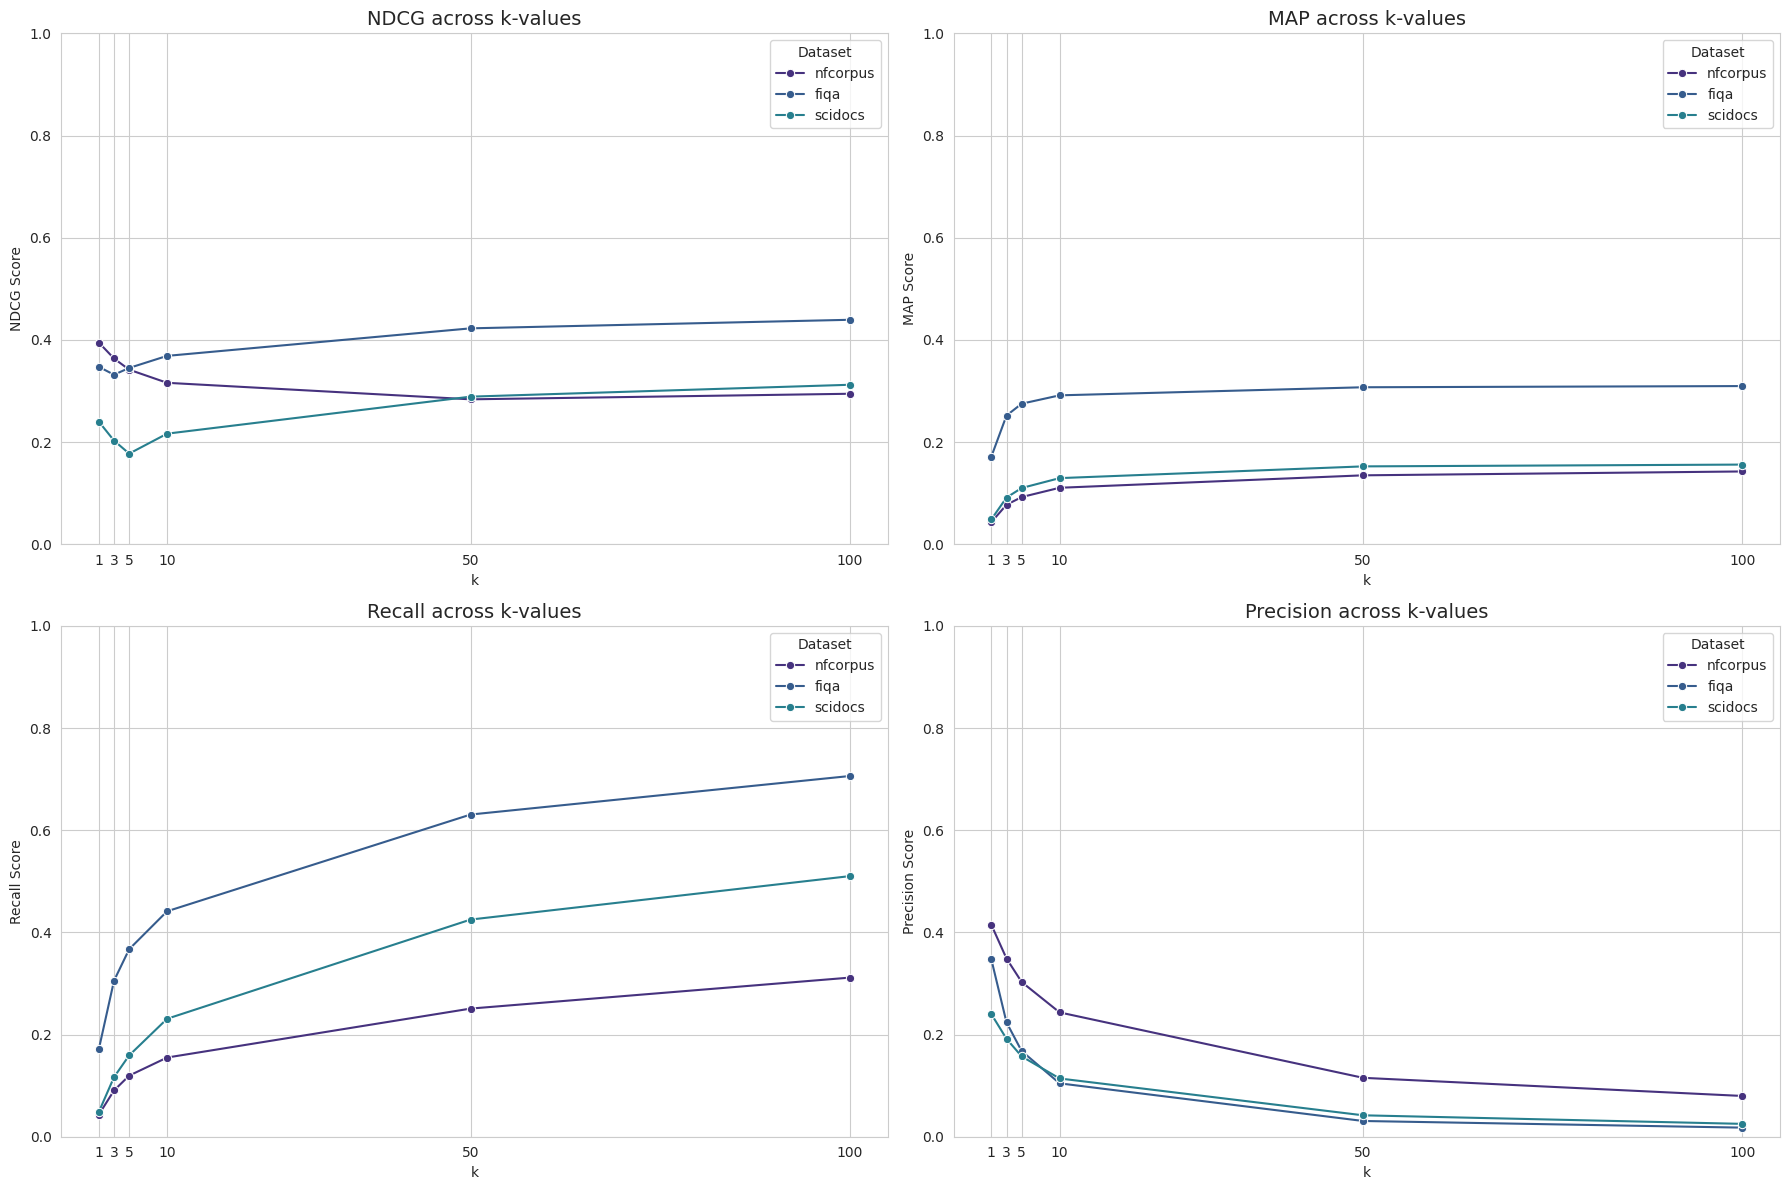

/tmp/ipython-input-16-1724129173.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dataset", y="Total Ingestion Time (s)", data=operational_df, palette="crest")
/tmp/ipython-input-16-1724129173.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Dataset", y="Estimated Embedding Size (MB)", data=operational_df, palette="mako")


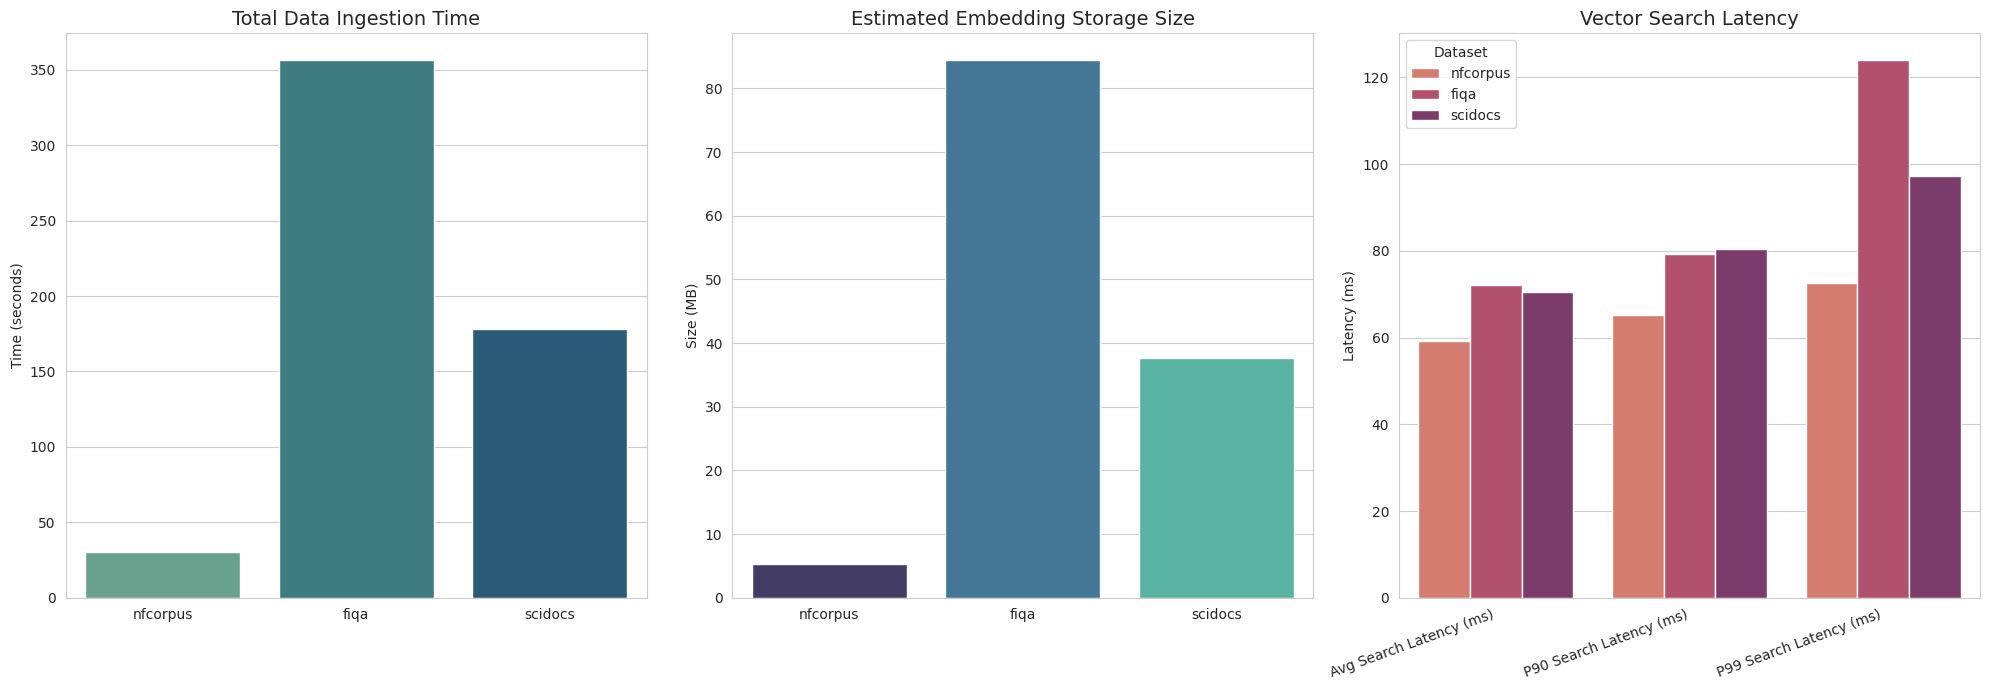


--- Generating Visualizations ---


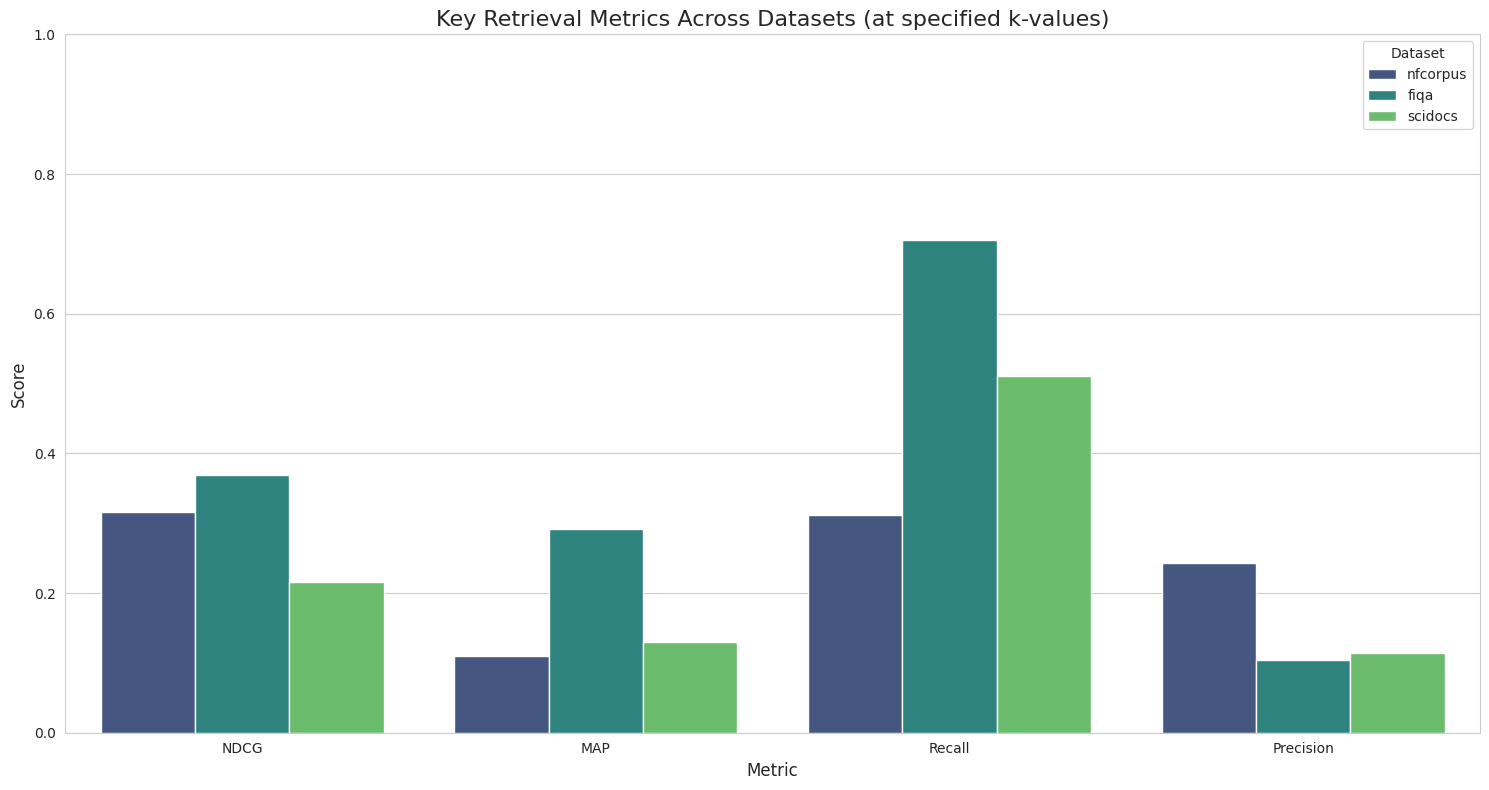

In [16]:
flattened_results = []
for dataset_result in all_evaluation_results:
    row = {"Dataset": dataset_result["Dataset"]}

    # Flatten NDCG@k
    for k_value_str, score in dataset_result["NDCG@k"].items():
        row[f"{k_value_str}"] = score

    # Flatten MAP@k
    for k_value_str, score in dataset_result["MAP@k"].items():
        row[f"{k_value_str}"] = score

    # Flatten Recall@k
    for k_value_str, score in dataset_result["Recall@k"].items():
        row[f"{k_value_str}"] = score

    # Flatten Precision@k (keys are P@k, not Precision@k)
    for k_value_str, score in dataset_result["Precision@k"].items():
        row[f"{k_value_str}"] = score

    flattened_results.append(row)

results_df = pd.DataFrame(flattened_results)

# Reorder columns for better readability
# Collect all metric@k column names, then sort them
metric_k_columns = sorted([col for col in results_df.columns if col != 'Dataset'])
ordered_columns = ['Dataset'] + metric_k_columns
results_df = results_df[ordered_columns]

# Print the final DataFrame to the console
print("\n--- Consolidated BEIR Evaluation Results ---")
print(results_df.to_string()) # Use to_string() to prevent truncation for wide tables

beir_plot_data = []
for dataset_result in all_evaluation_results:
    dataset_name = dataset_result["Dataset"]
    for metric_type, scores_dict in [
        ("NDCG", dataset_result["NDCG@k"]),
        ("MAP", dataset_result["MAP@k"]),
        ("Recall", dataset_result["Recall@k"]),
        ("Precision", dataset_result["Precision@k"])
    ]:
        # Iterate through all k_values for each metric
        for k_str, score in scores_dict.items():
            # Extract the integer k value from string like 'NDCG@10' or 'P@10'
            k_val = int(k_str.split('@')[-1])
            beir_plot_data.append({
                "Dataset": dataset_name,
                "Metric Type": metric_type,
                "k": k_val,
                "Score": score
            })
beir_plot_df = pd.DataFrame(beir_plot_data)

if not beir_plot_df.empty:
    # Create a figure with 2 rows and 2 columns for 4 plots
    plt.figure(figsize=(18, 12))
    sns.set_palette("viridis")

    # Plot NDCG
    plt.subplot(2, 2, 1)
    sns.lineplot(x="k", y="Score", hue="Dataset", data=beir_plot_df[beir_plot_df['Metric Type'] == 'NDCG'], marker='o')
    plt.title("NDCG across k-values", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("NDCG Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values) # Ensure all k_values are ticks
    plt.legend(title="Dataset", loc='best')

    # Plot MAP
    plt.subplot(2, 2, 2)
    sns.lineplot(x="k", y="Score", hue="Dataset", data=beir_plot_df[beir_plot_df['Metric Type'] == 'MAP'], marker='o')
    plt.title("MAP across k-values", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("MAP Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values)
    plt.legend(title="Dataset", loc='best')

    # Plot Recall
    plt.subplot(2, 2, 3)
    sns.lineplot(x="k", y="Score", hue="Dataset", data=beir_plot_df[beir_plot_df['Metric Type'] == 'Recall'], marker='o')
    plt.title("Recall across k-values", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("Recall Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values)
    plt.legend(title="Dataset", loc='best')

    # Plot Precision
    plt.subplot(2, 2, 4)
    sns.lineplot(x="k", y="Score", hue="Dataset", data=beir_plot_df[beir_plot_df['Metric Type'] == 'Precision'], marker='o')
    plt.title("Precision across k-values", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("Precision Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values)
    plt.legend(title="Dataset", loc='best')

    plt.tight_layout()
    # plt.savefig("beir_all_metrics_comprehensive.png", dpi=300)
    plt.show()
else:
    print("No BEIR evaluation data available for plotting.")

# --- Operational Metrics Visualization ---
operational_plot_data = []
for dataset_result in all_evaluation_results:
    operational_plot_data.append({
        "Dataset": dataset_result["Dataset"],
        "Total Ingestion Time (s)": dataset_result["Total_Ingestion_Time_s"],
        "Estimated Embedding Size (MB)": dataset_result["Estimated_Embedding_Size_MB"],
        "Avg Search Latency (ms)": dataset_result["Avg_Search_Latency_ms"],
        "P90 Search Latency (ms)": dataset_result["P90_Search_Latency_ms"],
        "P99 Search Latency (ms)": dataset_result["P99_Search_Latency_ms"]
    })
operational_df = pd.DataFrame(operational_plot_data)

if not operational_df.empty:
    plt.figure(figsize=(20, 7)) # Adjust figure size

    # Plot Ingestion Time
    plt.subplot(1, 3, 1)
    sns.barplot(x="Dataset", y="Total Ingestion Time (s)", data=operational_df, palette="crest")
    plt.title("Total Data Ingestion Time", fontsize=14)
    plt.ylabel("Time (seconds)", fontsize=10)
    plt.xlabel("")
    plt.tight_layout() # Ensure labels don't overlap

    # Plot Estimated Embedding Size
    plt.subplot(1, 3, 2)
    sns.barplot(x="Dataset", y="Estimated Embedding Size (MB)", data=operational_df, palette="mako")
    plt.title("Estimated Embedding Storage Size", fontsize=14)
    plt.ylabel("Size (MB)", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

    # Plot Search Latency (Avg, P90, P99)
    plt.subplot(1, 3, 3)
    latency_melted_df = operational_df.melt(id_vars=['Dataset'],
                                            value_vars=["Avg Search Latency (ms)", "P90 Search Latency (ms)", "P99 Search Latency (ms)"],
                                            var_name="Latency Type", value_name="Latency (ms)")
    sns.barplot(x="Latency Type", y="Latency (ms)", hue="Dataset", data=latency_melted_df, palette="flare")
    plt.title("Vector Search Latency", fontsize=14)
    plt.ylabel("Latency (ms)", fontsize=10)
    plt.xlabel("")
    plt.xticks(rotation=20, ha='right') # Rotate labels for readability
    plt.legend(title="Dataset", loc='best')
    plt.tight_layout()

    # Final layout adjustment for the entire figure
    plt.tight_layout()
    # plt.savefig("operational_metrics_summary.png", dpi=300)
    plt.show()
else:
    print("No operational metrics data available for plotting.")

#  Generate plots or charts to visualize the performance
print("\n--- Generating Visualizations ---")

# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

# Define metrics and k-values to plot
metrics_to_plot = {
    "NDCG": "NDCG@10",
    "MAP": "MAP@10",
    "Recall": "Recall@100",
    "Precision": "P@10" #
}

# Prepare data for plotting (melt the DataFrame)
# Create a long-format DataFrame suitable for Seaborn
plot_data = []
for index, row in results_df.iterrows():
    dataset = row['Dataset']
    for metric_name, col_name in metrics_to_plot.items():
        if col_name in row: # Ensure the column exists
            plot_data.append({
                "Dataset": dataset,
                "Metric": metric_name,
                "Value": row[col_name],
                "K_Value": col_name.split('@')[-1] # Extract K value for labeling
            })

plot_df = pd.DataFrame(plot_data)

if not plot_df.empty:
    # Create a bar plot
    sns.barplot(x="Metric", y="Value", hue="Dataset", data=plot_df, palette="viridis")
    plt.title("Key Retrieval Metrics Across Datasets (at specified k-values)", fontsize=16)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.ylim(0, 1.0) # Metrics are usually between 0 and 1
    plt.legend(title="Dataset")
    plt.tight_layout()

    # Save the plot
    # plot_filename = "beir_evaluation_summary.png"
    # plt.savefig(plot_filename, dpi=300)
    # print(f"Plot saved to {plot_filename}")

    plt.show()